In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
#To see all the dataset available in seaborn
sns.get_dataset_names()
#To extract the data we use  = smp.load_dataset("")

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [3]:
Iris=sns.load_dataset('iris')

In [5]:
Iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [17]:
Iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [18]:
Iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [20]:
Iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

<Axes: ylabel='sepal_length'>

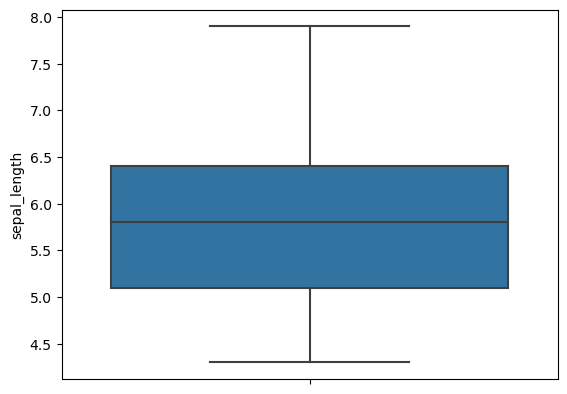

In [22]:
#Eliminate possible outliers by generating box-whisker plots.
sns.boxplot(y='sepal_length', data=Iris)

In [40]:
lowerLimit = Iris['sepal_width'].quantile(0.10)
upperLimit = Iris['sepal_width'].quantile(0.98)
lowerLimit

2.5

In [36]:
upperLimit

4.002000000000001

In [41]:
Iris['sepal_width'] = Iris['sepal_width'].clip(lowerLimit, upperLimit)

<Axes: ylabel='sepal_width'>

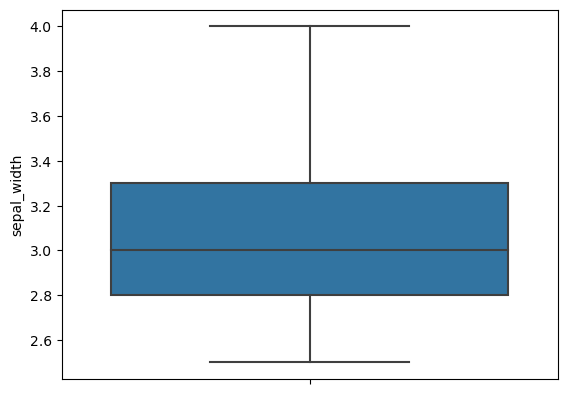

In [42]:
sns.boxplot(y='sepal_width', data=Iris)

<Axes: ylabel='petal_length'>

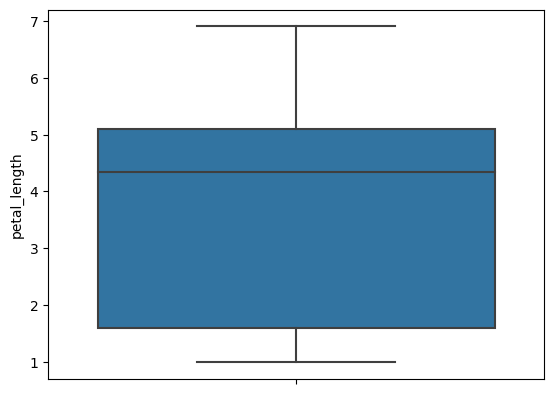

In [43]:
sns.boxplot(y='petal_length', data=Iris)

<Axes: ylabel='petal_width'>

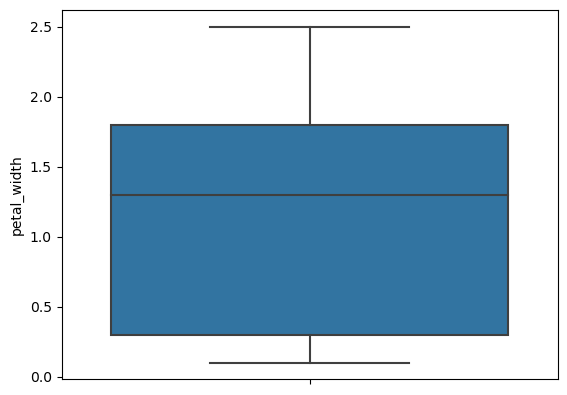

In [44]:
sns.boxplot(y='petal_width', data=Iris)

In [45]:
X = Iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
       

In [46]:
Y = Iris['species']

In [49]:
#Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [51]:
#creating the model
from sklearn.svm import SVC
model = SVC(decision_function_shape='ovo') 

In [52]:
#Then, we train the model using the training sets
model.fit(X_train, Y_train)



SVC(decision_function_shape='ovo')

In [53]:
#Then we predict the response for the test dataset
Y_pred = model.predict(X_test)



In [54]:
Y_pred

array(['versicolor', 'virginica', 'virginica', 'virginica', 'versicolor',
       'setosa', 'virginica', 'virginica', 'versicolor', 'setosa',
       'setosa', 'setosa', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'virginica', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'virginica'],
      dtype=object)

In [56]:
#Then we evaluate the model’s prediction using the accuracy_score and confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

("Accuracy:", accuracy_score(Y_test, Y_pred))

('Accuracy:', 0.9333333333333333)

In [57]:
(confusion_matrix(Y_test, Y_pred))

array([[10,  0,  0],
       [ 0,  5,  2],
       [ 0,  0, 13]], dtype=int64)

In [58]:
cm=(confusion_matrix(Y_test, Y_pred))

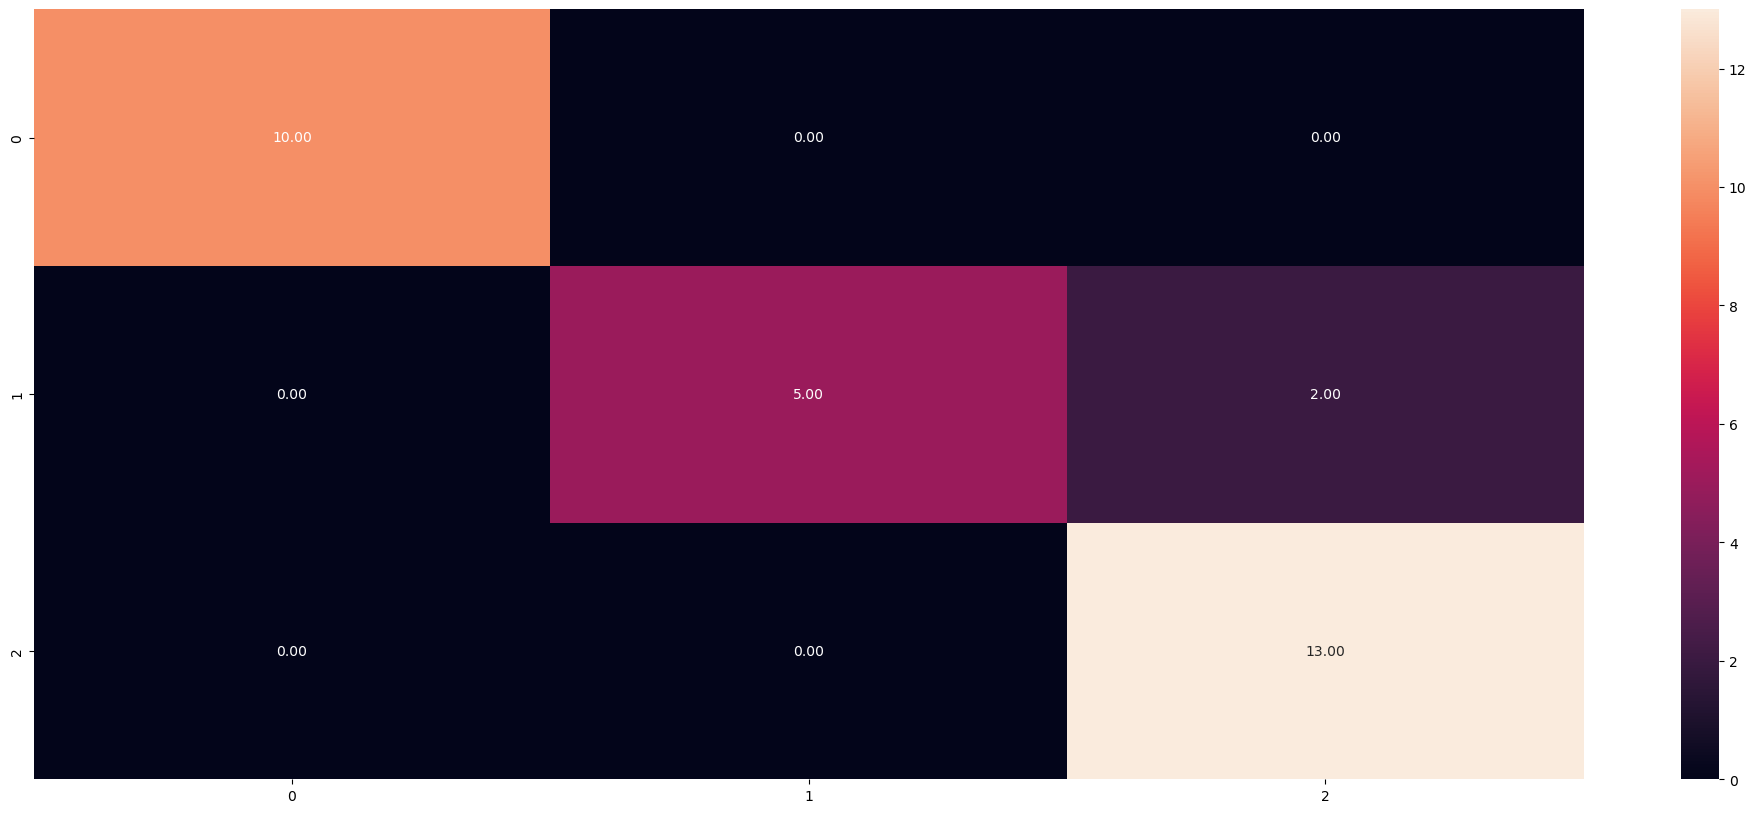

In [59]:
# Visualize the confusion matrix using Seabornsns.heatmap(cm, annot=True, fmt="d")
plt.figure(figsize=(25,10))
sns.heatmap(cm, annot=True, fmt=".2f")
plt.show()